In [8]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from scipy.stats import zscore

In [10]:
cp = pd.read_excel("cp_data_schoon.xlsx")

{'whiskers': [<matplotlib.lines.Line2D at 0x1bdf6a1fb10>,
 'caps': [<matplotlib.lines.Line2D at 0x1bdf6a1fd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bdf688e350>],
 'medians': [<matplotlib.lines.Line2D at 0x1bdf6a50050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bdf6a50190>],
 'means': []}

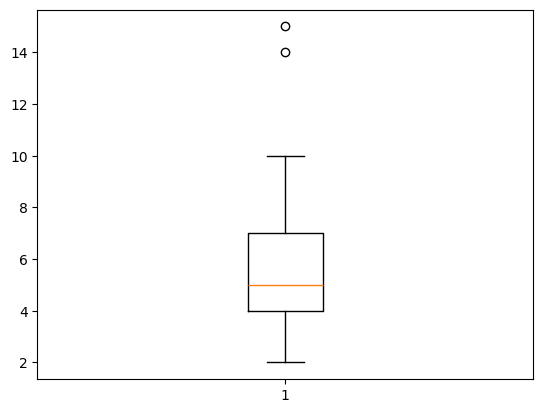

In [11]:
#cp = cp[cp['uschermtijd'] < 12 ]
plt.boxplot(cp['uschermtijd'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bdf6ac96d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bdf6ac9950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bdf6ac9590>],
 'medians': [<matplotlib.lines.Line2D at 0x1bdf6ac9bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bdf6ac9d10>],
 'means': []}

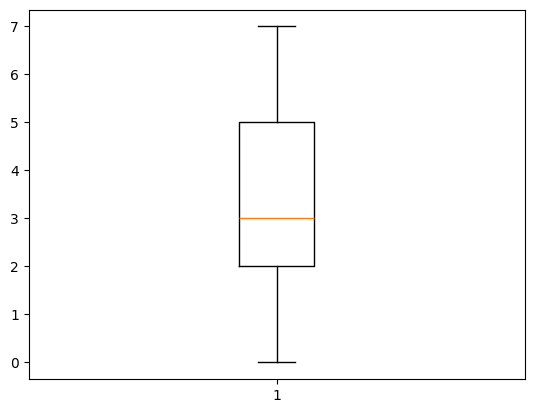

In [12]:
#outliers weghalen
cp = cp[cp['umedia'] < 8 ]
plt.boxplot(cp["umedia"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1bdf6b3a0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bdf6b3a350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bdf6b39f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1bdf6b3a5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bdf6b3a710>],
 'means': []}

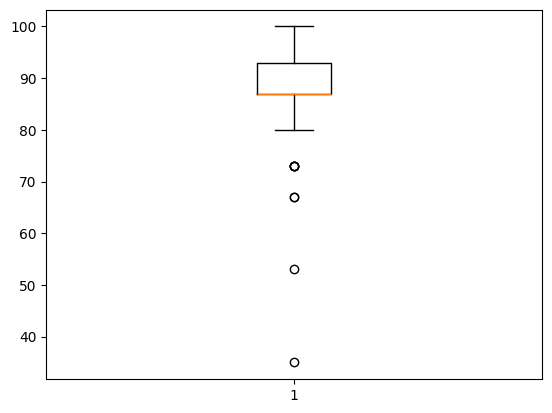

In [13]:
#outliers weghalen

plt.boxplot(cp["mrpercentage"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1bdf69a5450>,
 'caps': [<matplotlib.lines.Line2D at 0x1bdf69a56d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bdf69a5310>],
 'medians': [<matplotlib.lines.Line2D at 0x1bdf69a5950>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bdf69a5a90>],
 'means': []}

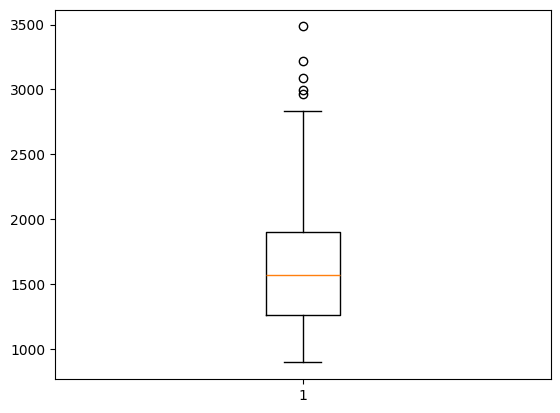

In [14]:
cp = cp[cp['mrtijd'] > 500 ]
plt.boxplot(cp['mrtijd'])


In [15]:
from scipy import stats
import numpy as np


D, p = stats.kstest(cp['mrpercentage'], "norm")  # Perform a one-sided Kolmogorov-Smirnov test
#print(cp['mrtijd'].corr(cp['umedia'], method= 'spearman'))

data = cp['uschermtijd']
data1 = cp['mrpercentage']
data2 = cp['mrtijd']
stat1, p1 = shapiro(data)
stat2, p2 = shapiro(data2)



alpha = 0.05
print(stat1,p1 )
if p > alpha:
    print(' schermtijd Sample looks Gaussian (fail to reject H0)')
else:
    print('schermtijd Sample does not look Gaussian (reject H0)')

if p1 > alpha:
    print('precentage Sample looks Gaussian (fail to reject H0)')
else:
    print('percentage Sample does not look Gaussian (reject H0)')

0.9165958194800851 7.300144328615728e-05
schermtijd Sample does not look Gaussian (reject H0)
percentage Sample does not look Gaussian (reject H0)


In [16]:
stat, wil = wilcoxon(data, data1)
alpha = 0.05
if wil > alpha:
    print('There is no significant difference between the two datasets (fail to reject H0)')
else:
    print('There is a significant difference between the two datasets (reject H0)')

There is a significant difference between the two datasets (reject H0)


{'whiskers': [<matplotlib.lines.Line2D at 0x1bdf6bcc410>,
 'caps': [<matplotlib.lines.Line2D at 0x1bdf6bcc690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bdf6bcc2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bdf6bcc910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bdf6bcca50>],
 'means': []}

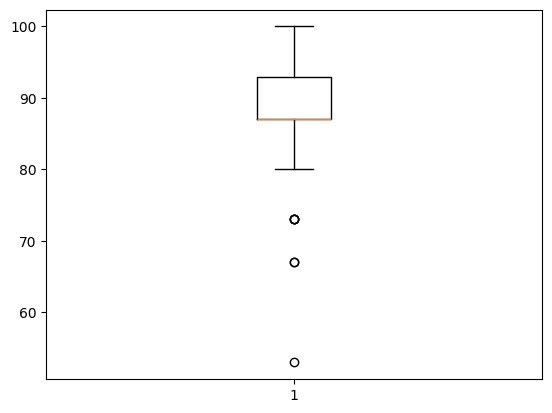

In [17]:

plt.boxplot(cp['mrpercentage'])

In [18]:
ding = cp["mrtijd"]
ding.mean(), ding.median(), ding.mode()[0], ding.std(), ding.var(axis=0)

(np.float64(1642.1772151898733),
 np.float64(1568.0),
 np.int64(1700),
 np.float64(554.1245985843328),
 np.float64(307054.07075624797))

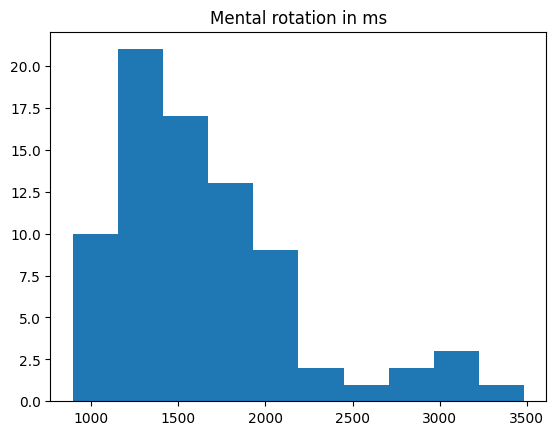

In [19]:
plt.title('Mental rotation in ms')
plt.hist(ding)

plt.savefig('hist.png')

In [20]:
from scipy.stats import spearmanr
cor, p_value = spearmanr(cp["uschermtijd"], cp["mrtijd"])
cor, p_value

(np.float64(-0.09275661274737174), np.float64(0.4161877661577833))

In [21]:
cor, p_value = spearmanr(cp["uschermtijd"], cp["mrpercentage"])
cor, p_value

(np.float64(0.027455696191367653), np.float64(0.8101851723336215))

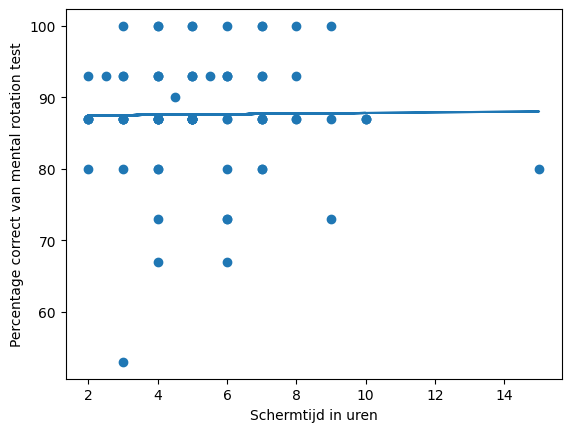

In [22]:
#scatterplot 1
x = cp["uschermtijd"]
y = cp["mrpercentage"]
plt.scatter(x, y)
plt.xlabel('Schermtijd in uren')
plt.ylabel('Percentage correct van mental rotation test')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))

In [23]:
#scatterplot 2
x = cp2["uschermtijd"]
y = cp2["mrtijd"]
plt.scatter(x, y)
plt.xlabel('Schermtijd in uren')
plt.ylabel('Tijd gedaan over mental rotation test')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x))

NameError: name 'cp2' is not defined